In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('nba.csv')

Выборка представляет собой статистику бросков для различных игроков NBA. Для каждого игрока известны:

* количество успешных бросков в домашних играх (score_home)
* количество бросков в домашних играх (atm_home)
* количество успешных бросков в гостевых играх (score_away)
* количество бросков в гостевых играх (atm_away)

Требуется определить, есть ли разница в успехе бросков у игроков в домашних и гостевых играх.


Наши данные выгдядят следующим образом:

In [2]:
df.head()

,Unnamed: 0,player,team,atm_away,atm_home,score_away,score_home,atm_total,score_total
0,7,A. Johnson,ATL,30,34,24,28,64,52
1,10,A. Johnson,TOR,63,57,44,38,120,82
2,15,Abdur-Rahim,SAC,114,124,84,90,238,174
3,22,Afflalo,DEN,236,284,189,227,520,416
4,23,Afflalo,DET,75,88,62,67,163,129


In [3]:
df.shape

(936, 9)

Всего команд:

In [4]:
df['team'].unique().size

32

Кол-во игроков в каждой из команд:

In [23]:
df.groupby(['team']).size()

team
ATL    29
BOS    29
CHA    36
CHI    29
CLE    31
DAL    27
DEN    30
DET    27
GSW    34
HOU    28
IND    35
LAC    38
LAL    22
MEM    30
MIA    29
MIL    37
MIN    36
NJN    39
NOH    34
NOK    11
NYK    33
OKC    16
ORL    28
PHI    21
PHX    30
POR    30
SAC    32
SAS    27
SEA    13
TOR    35
UTA    27
WAS    33
dtype: int64

### Обработка данных:

In [5]:
compare = pd.DataFrame([])
compare['res_away'] = df['score_away'] / df['atm_away']  
compare['res_home'] = df['score_home'] / df['atm_home']  

In [6]:
compare.head()

,res_away,res_home
0,0.800000,0.823529
1,0.698413,0.666667
2,0.736842,0.725806
3,0.800847,0.799296
4,0.826667,0.761364


Рассмотрим пока игроков, которые и дома и в гостях бросали больше 150 бросков:

In [58]:
index = (df['atm_away'] > 150) & (df['atm_home'] > 150)
part_df = df[index] 
part_compare = pd.DataFrame([])
part_compare['res_away'] = part_df['score_away'] / part_df['atm_away']  
part_compare['res_home'] = part_df['score_home'] / part_df['atm_home']  

Кол-во баскетболистов:

In [49]:
index.sum()

307

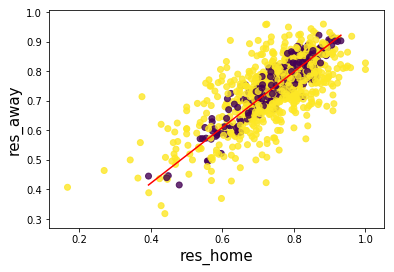

In [50]:
import matplotlib.pyplot as plt

plt.scatter(compare['res_home'], compare['res_away'], c=1-index, alpha=0.8)
#plt.scatter(part_compare['res_home'], part_compare['res_away'])
plt.xlabel('res_home', fontsize=15)
plt.ylabel('res_away', fontsize=15)
plt.plot([min(part_compare['res_home']), max(part_compare['res_home'])], [min(part_compare['res_away']), max(part_compare['res_away'])], 'r')
plt.show()

### Вывод: 
дисперсия part_compare меньше

In [51]:
diff = (part_compare['res_away'] - part_compare['res_home'])

### Сравним разность результатов с нормальным распределением:

/home/anton/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


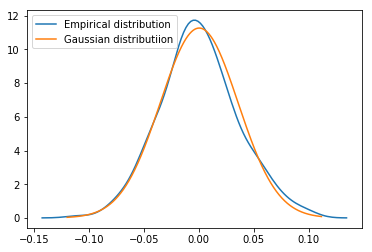

In [52]:
import seaborn as sns
import scipy.stats as st

sns.distplot(diff, hist=False, label='Empirical distribution')
x = np.arange(diff.min() - 0.01, diff.max() + 0.01, 0.0001)
plt.plot(x, st.distributions.norm(diff.mean(), diff.std()).pdf(x), label='Gaussian distributiion')
plt.legend()
plt.show()

Q-Q plot

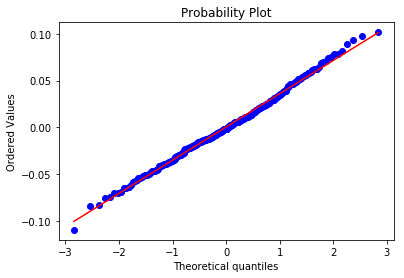

In [53]:
st.probplot(diff, plot=plt)
plt.show()

Посмотрим на параметры нашего распределения:

In [54]:
diff.describe()

count    307.000000
mean       0.000468
std        0.035401
min       -0.109626
25%       -0.021379
50%       -0.001364
75%        0.022333
max        0.101748
dtype: float64

### Применим критерии

Критерий Колмогорова:

In [55]:
from statsmodels.stats.diagnostic import kstest_normal
print('p-value', round(kstest_normal(diff, dist='norm', pvalmethod='approx')[1], 4))

p-value 0.2


Критерий Шапиро-Уилка:

In [56]:
print('p-value', round(st.shapiro(diff)[1], 4))

p-value 0.6109


Критерий Харке-Бера:

In [57]:
print('p-value', round(st.jarque_bera(diff)[1], 4))

p-value 0.4803


### Вывод:
нормальность наблюдается

Используем критерий Стьюдента для связанных выборок

In [61]:
print('p-value', round(st.ttest_rel(part_compare['res_away'], part_compare['res_home'])[1], 4))

p-value 0.8169


### Вывод:
нулевую гипотезу о равенстве качества бросков дома и в гостях мы не отклоняем